In [3]:
# Import library
from pyspark.sql import SparkSession

# Membuat Spark session
spark = SparkSession.builder.appName("Basic SQL in Spark").getOrCreate()

# Dataset sederhana
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]

# Kolom
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

# Membuat DataFrame
df = spark.createDataFrame(data, schema=columns)

# Menampilkan DataFrame
print("Data Asli:")
df.show()

# Membuat temporary view
df.createOrReplaceTempView('employees')

# Menampilkan semua data
print("1. Semua data:")
spark.sql('SELECT * FROM employees').show()

# Menampilkan nama dan umur karyawan dengan gaji lebih dari 3000
print("2. Karyawan dengan Salary > 3000:")
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()

# Menghitung rata-rata gaji
print("3. Rata-rata Salary:")
spark.sql('SELECT AVG(Salary) AS Average_Salary FROM employees').show()


Data Asli:
+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

1. Semua data:
+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

2. Karyawan dengan Salary > 3000:
+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

3. Rata-rata Salary:
+------------------+
|    Average_Salary|
+------------------+
|3266.6666666666665|
+------------------+



In [4]:
print("Tugas 2: Total gaji berdasarkan jenis kelamin dan usia")
spark.sql('''
SELECT Gender, Age, SUM(Salary) AS TotalSalary
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

Tugas 2: Total gaji berdasarkan jenis kelamin dan usia
+------+---+-----------+
|Gender|Age|TotalSalary|
+------+---+-----------+
|     M| 23|       2700|
|     F| 28|       4100|
|     M| 34|       3000|
+------+---+-----------+



In [5]:
print("Tugas Tambahan 2a: Rata-rata gaji per departemen")
spark.sql('''
SELECT DeptId, ROUND(AVG(Salary), 2) AS AvgSalary
FROM employees
GROUP BY DeptId
ORDER BY DeptId
''').show()


Tugas Tambahan 2a: Rata-rata gaji per departemen
+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+



In [6]:
print("Tugas Tambahan 2b: Gaji di atas rata-rata per gender")
spark.sql('''
SELECT e.Name, e.Gender, e.Salary
FROM employees e
WHERE e.Salary > (
    SELECT AVG(Salary)
    FROM employees
    WHERE Gender = e.Gender
)
ORDER BY e.Gender, e.Salary DESC
''').show()


Tugas Tambahan 2b: Gaji di atas rata-rata per gender
+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
+-----+------+------+



In [7]:
print("Tugas Tambahan 2c: Ranking karyawan berdasarkan gaji dalam departemen")
spark.sql('''
SELECT 
    Name, 
    DeptId, 
    Salary,
    RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS RankInDept
FROM employees
ORDER BY DeptId, RankInDept
''').show()


Tugas Tambahan 2c: Ranking karyawan berdasarkan gaji dalam departemen
+-----+------+------+----------+
| Name|DeptId|Salary|RankInDept|
+-----+------+------+----------+
|James|     1|  3000|         1|
|  Lee|     1|  2700|         2|
| Anna|     2|  4100|         1|
+-----+------+------+----------+



In [8]:
spark.sql('''
SELECT Name, Age, Salary, 
       ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [11]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])

projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# 🔍 Query dengan multi-level join + subquery
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName, e.Salary,
       (SELECT ROUND(AVG(Salary), 2) 
        FROM employees e2 
        WHERE e2.DeptId = e.DeptId) AS AvgDeptSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
ORDER BY d.DeptName, e.Salary DESC
''').show()


+-----+---+---------+-----------+------+-------------+
| Name|Age| DeptName|ProjectName|Salary|AvgDeptSalary|
+-----+---+---------+-----------+------+-------------+
|James| 34|       HR|  Project A|  3000|       2850.0|
|  Lee| 23|       HR|  Project A|  2700|       2850.0|
| Anna| 28|Marketing|  Project B|  4100|       4100.0|
+-----+---+---------+-----------+------+-------------+



In [12]:
print("Tugas 5: Rata-rata gaji per departemen dan ranking karyawan dalam departemen")
spark.sql('''
SELECT 
    e.Name,
    d.DeptName,
    e.Salary,
    ROUND(AVG(e.Salary) OVER (PARTITION BY e.DeptId), 2) AS AvgDeptSalary,
    RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS RankInDept
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, RankInDept
''').show()


Tugas 5: Rata-rata gaji per departemen dan ranking karyawan dalam departemen
+-----+---------+------+-------------+----------+
| Name| DeptName|Salary|AvgDeptSalary|RankInDept|
+-----+---------+------+-------------+----------+
|James|       HR|  3000|       2850.0|         1|
|  Lee|       HR|  2700|       2850.0|         2|
| Anna|Marketing|  4100|       4100.0|         1|
+-----+---------+------+-------------+----------+



In [13]:
print("Tugas 6: Tren gaji berdasarkan usia di setiap departemen")
spark.sql('''
SELECT 
    e.Name,
    d.DeptName,
    e.Age,
    e.Salary,
    LAG(e.Salary, 1) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS PrevSalary,
    (e.Salary - LAG(e.Salary, 1) OVER (PARTITION BY e.DeptId ORDER BY e.Age)) AS SalaryChange
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
''').show()


Tugas 6: Tren gaji berdasarkan usia di setiap departemen
+-----+---------+---+------+----------+------------+
| Name| DeptName|Age|Salary|PrevSalary|SalaryChange|
+-----+---------+---+------+----------+------------+
|  Lee|       HR| 23|  2700|      NULL|        NULL|
|James|       HR| 34|  3000|      2700|         300|
| Anna|Marketing| 28|  4100|      NULL|        NULL|
+-----+---------+---+------+----------+------------+



Data hasil analisis tren gaji per usia:
   Age  AverageSalary
0   23         2700.0
1   28         4100.0
2   34         3000.0


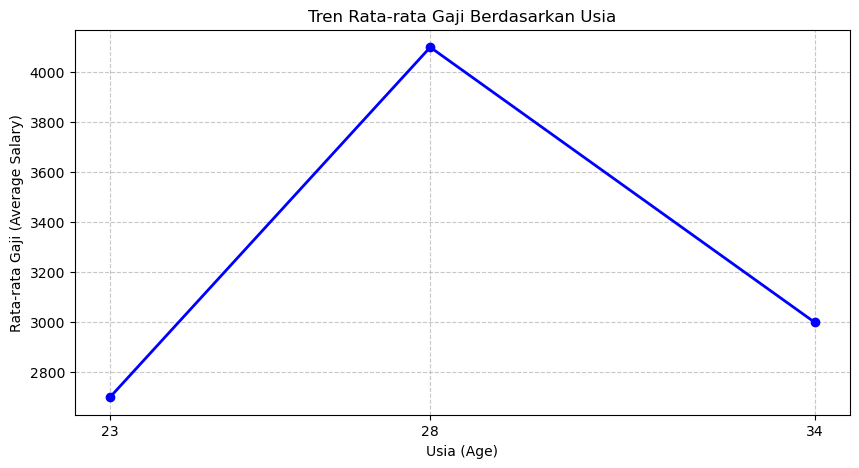

In [17]:
# Tugas 7: Salary Trend Analysis & Visualization
# ----------------------------------------------

from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan Spark session sudah aktif
spark = SparkSession.builder.appName("SalaryTrendAnalysis").getOrCreate()

# Dataset contoh (bisa pakai dataset yang sama dari tugas sebelumnya)
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

employees.createOrReplaceTempView('employees')

# Analisis Tren Gaji per Usia
# ---------------------------
salary_trends = spark.sql('''
SELECT Age, ROUND(AVG(Salary), 2) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

print("Data hasil analisis tren gaji per usia:")
print(salary_trends)

# Visualisasi Tren Gaji
# ---------------------
plt.figure(figsize=(10, 5))
plt.plot(
    salary_trends['Age'], 
    salary_trends['AverageSalary'], 
    marker='o', 
    linewidth=2, 
    color='blue'
)
plt.xlabel('Usia (Age)')
plt.ylabel('Rata-rata Gaji (Average Salary)')
plt.title('Tren Rata-rata Gaji Berdasarkan Usia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(salary_trends['Age'])
plt.show()


=== Total Gaji dan Jumlah Karyawan per Departemen ===
  Department  JumlahKaryawan  TotalGaji
0         HR               3       9000
1    Finance               2       8000
2         IT               2       6200


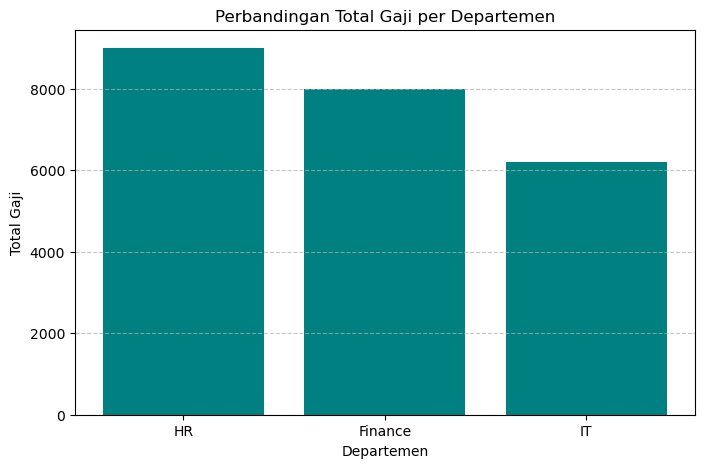

In [30]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.appName("Homework_Tugas1").getOrCreate()

# Dataset karyawan dan departemen
employees = spark.createDataFrame([
    ('James', 'HR', 3000),
    ('Anna', 'Finance', 4100),
    ('Lee', 'IT', 2700),
    ('Ilyasa', 'Finance', 3900),
    ('Abiyyu', 'HR', 3200),
    ('Putri', 'IT', 3500),
    ('Budi', 'HR', 2800)
], ['Name', 'Department', 'Salary'])

employees.createOrReplaceTempView("employees")

# SQL Query
tugas1 = spark.sql('''
SELECT Department,
       COUNT(Name) AS JumlahKaryawan,
       SUM(Salary) AS TotalGaji
FROM employees
GROUP BY Department
ORDER BY TotalGaji DESC
''').toPandas()

print("=== Total Gaji dan Jumlah Karyawan per Departemen ===")
print(tugas1)

# Visualisasi perbandingan antar departemen
plt.figure(figsize=(8,5))
plt.bar(tugas1['Department'], tugas1['TotalGaji'], color='teal')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.title('Perbandingan Total Gaji per Departemen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

=== Karyawan dengan Gaji di Atas Rata-rata Usianya ===
     Name Age  Salary
0    Anna  28    4100
1  Abiyyu  34    3200


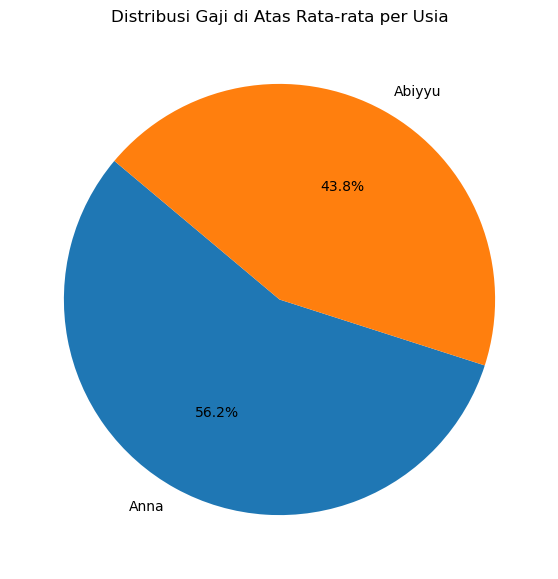

In [35]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("Homework_Tugas2").getOrCreate()

# Dataset contoh
employees_age = spark.createDataFrame([
    ('James', 34, 3000),
    ('Anna', 28, 4100),
    ('Lee', 23, 2700),
    ('Ilyasa', 28, 3900),
    ('Abiyyu', 34, 3200),
    ('Putri', 'IT', 3500),
    ('Budi', 'HR', 2800)
], ['Name', 'Age', 'Salary'])

employees_age.createOrReplaceTempView("employees_age")

# Query SQL
above_avg = spark.sql('''
SELECT Name, Age, Salary
FROM employees_age e
WHERE Salary > (
    SELECT AVG(Salary)
    FROM employees_age a
    WHERE a.Age = e.Age
)
ORDER BY Age
''').toPandas()

print("=== Karyawan dengan Gaji di Atas Rata-rata Usianya ===")
print(above_avg)

# Visualisasi Pie Chart
plt.figure(figsize=(7,7))
plt.pie(above_avg['Salary'], labels=above_avg['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Gaji di Atas Rata-rata per Usia')
plt.show()

=== Analisis Gaji dan Karyawan per Departemen ===
  Department    Location  JumlahKaryawan  RataRataGaji  TotalGaji
0         IT     Bandung              30       5546.07     166382
1    Finance    Surabaya              24       5131.38     123153
2         HR     Jakarta              23       5316.78     122286
3  Marketing       Medan              24       4904.08     117698
4      Sales  Yogyakarta              19       5704.00     108376


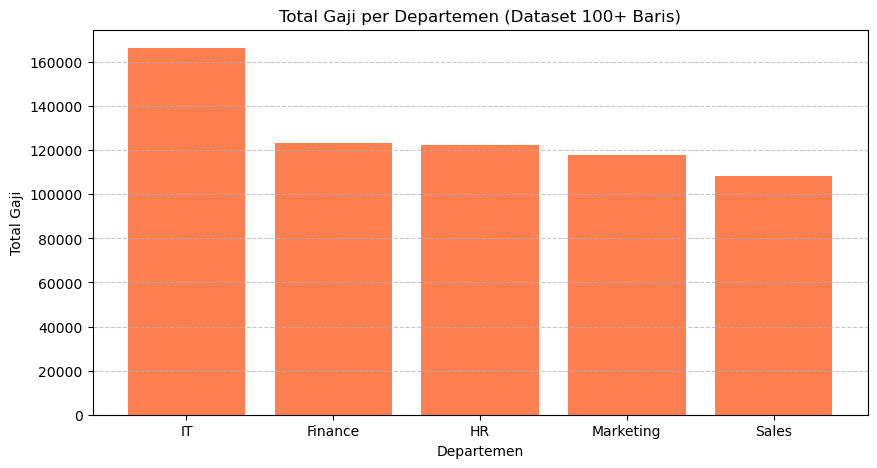

In [42]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import random

spark = SparkSession.builder.appName("Homework_Tugas3").getOrCreate()

# Buat dataset besar (100+ baris)
departments = ['HR', 'Finance', 'IT', 'Marketing', 'Sales']
names = ['James', 'Anna', 'Lee', 'Ilyasa', 'Abiyyu', 'Putri']

data = []
for i in range(120):
    name = random.choice(names) + str(i)
    dept = random.choice(departments)
    age = random.randint(22, 50)
    salary = random.randint(2500, 8000)
    data.append((name, age, salary, dept))

# DataFrame utama
employees = spark.createDataFrame(data, ['Name', 'Age', 'Salary', 'Department'])

# Tambahkan tabel departemen
departments_df = spark.createDataFrame([
    ('HR', 'Jakarta'),
    ('Finance', 'Surabaya'),
    ('IT', 'Bandung'),
    ('Marketing', 'Medan'),
    ('Sales', 'Yogyakarta')
], ['Department', 'Location'])

employees.createOrReplaceTempView("employees")
departments_df.createOrReplaceTempView("departments")

# Analisis gabungan (JOIN + agregasi)
tugas3 = spark.sql('''
SELECT 
    d.Department,
    d.Location,
    COUNT(e.Name) AS JumlahKaryawan,
    ROUND(AVG(e.Salary), 2) AS RataRataGaji,
    SUM(e.Salary) AS TotalGaji
FROM employees e
JOIN departments d ON e.Department = d.Department
GROUP BY d.Department, d.Location
ORDER BY TotalGaji DESC
''').toPandas()

print("=== Analisis Gaji dan Karyawan per Departemen ===")
print(tugas3)
# Visualisasi
plt.figure(figsize=(10,5))
plt.bar(tugas3['Department'], tugas3['TotalGaji'], color='coral')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.title('Total Gaji per Departemen (Dataset 100+ Baris)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()